<a href="https://colab.research.google.com/github/anwarbabukm/DeepLearning/blob/main/IMDB_Review_Sentiment_using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
X_train[0][:5]

[1, 14, 22, 16, 43]

In [4]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [5]:
X_train.shape

(25000, 100)

In [6]:
vocab_size = 20000
embed_size = 128



In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [8]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 51s 258ms/step - loss: 0.4245 - accuracy: 0.8015 - val_loss: 0.3446 - val_accuracy: 0.8490
Epoch 2/10
196/196 [==============================] - 50s 255ms/step - loss: 0.2344 - accuracy: 0.9087 - val_loss: 0.3837 - val_accuracy: 0.8444
Epoch 3/10
196/196 [==============================] - 50s 257ms/step - loss: 0.1472 - accuracy: 0.9482 - val_loss: 0.5031 - val_accuracy: 0.8327
Epoch 4/10
196/196 [==============================] - 51s 259ms/step - loss: 0.0901 - accuracy: 0.9692 - val_loss: 0.4836 - val_accuracy: 0.8359
Epoch 5/10
196/196 [==============================] - 50s 257ms/step - loss: 0.0661 - accuracy: 0.9784 - val_loss: 0.7153 - val_accuracy: 0.8175
Epoch 6/10
196/196 [==============================] - 52s 264ms/step - loss: 0.0504 - accuracy: 0.9833 - val_loss: 0.7653 - val_accuracy: 0.8238
Epoch 7/10
196/196 [==============================] - 50s 253ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.7267 - val_ac

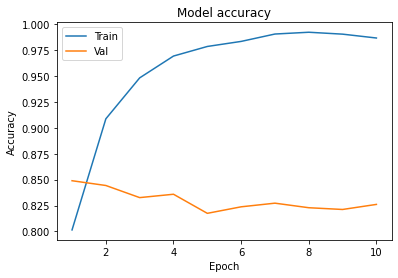

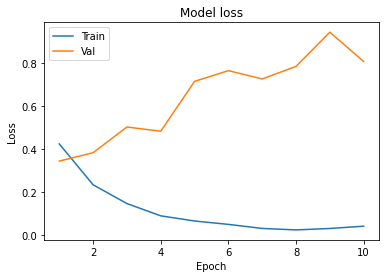

In [11]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)